In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/drive/MyDrive/Urban.pcap_Flow.csv')
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.8.100-192.168.8.101-49206-51986-6,192.168.8.101,51986,192.168.8.100,49206,6,05/02/2019 11:09:25 PM,119888610,3423,1193,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
1,192.168.0.4-192.168.0.5-80-60105-17,192.168.0.5,60105,192.168.0.4,80,17,05/02/2019 11:09:26 PM,119160542,707,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
2,192.168.0.4-192.168.0.5-60105-80-17,192.168.0.4,60105,192.168.0.5,80,17,05/02/2019 11:09:26 PM,118224341,239,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
3,192.168.0.3-192.168.0.5-80-60105-17,192.168.0.5,60105,192.168.0.3,80,17,05/02/2019 11:09:26 PM,119160096,235,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,134.221.96.0-0.0.0.43-0-0-0,134.221.96.0,0,0.0.0.43,0,0,05/02/2019 11:09:26 PM,116529844,43,1,...,0,1.224472e+07,7.669509e+06,22506408.0,4002351.0,1.257098e+07,4.512221e+06,16828132.0,7792749.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261887,192.168.0.3-192.168.0.6-80-62398-6,192.168.0.6,62398,192.168.0.3,80,6,05/02/2019 11:18:33 PM,98741051,5,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,1.974821e+07,1.151413e+07,32923440.0,7829935.0,No Label
261888,192.168.0.4-192.168.0.6-80-29086-6,192.168.0.6,29086,192.168.0.4,80,6,05/02/2019 11:20:28 PM,119056087,6,15,...,0,9.673333e+02,1.406954e+03,3831.0,274.0,1.984160e+07,1.754312e+07,51241798.0,5151349.0,No Label
261889,192.168.0.3-192.168.0.6-80-10271-6,192.168.0.6,10271,192.168.0.3,80,6,05/02/2019 11:18:39 PM,89335497,5,1,...,0,0.000000e+00,0.000000e+00,0.0,0.0,2.114271e+07,2.135641e+07,52941210.0,8119548.0,No Label
261890,192.168.0.4-192.168.0.6-80-45445-6,192.168.0.6,45445,192.168.0.4,80,6,05/02/2019 11:21:44 PM,23482663,2,7,...,0,3.735000e+02,2.050610e+01,388.0,359.0,1.174078e+07,4.711062e+06,15072007.0,8409559.0,No Label


In [ ]:
df = df.dropna()

In [ ]:
df= df.drop(['Flow ID' , 'Dst IP' , 'Timestamp' ,'Label'] , axis=1)


In [ ]:
df.rename({'Src IP':'Label'} , axis=1 , inplace=True)

In [ ]:
df['Label'] = ["UDP flood" if x=="192.168.0.8"
               else "SYN flood" if x=="192.168.0.6"
               else "Slowries" if x=="192.168.0.7"
               else "Benign" for x in df['Label']]

In [ ]:
class_0 = df[df['Label'] == 'UDP flood']
class_1 = df[df['Label'] == 'Slowries']
class_2 =df[df['Label'] == 'SYN flood']
class_3 =df[df['Label'] == 'Benign']

In [ ]:
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (112186, 80)

class 1: (650, 80)


In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index
np.where(np.isinf(df[numeric_features]))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
class_count_0= 112000


In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_3_over = class_3.sample(class_count_0, replace=True)


df = pd.concat([class_1_over, class_0 , class_2, class_3_over])

# print the number of class count
df['Label'].value_counts()

SYN flood    124968
UDP flood    112186
Slowries     112000
Benign       112000
Name: Label, dtype: int64

In [ ]:
df['Label'].value_counts()

SYN flood    124968
UDP flood    112186
Slowries      80000
Benign        80000
Name: Label, dtype: int64

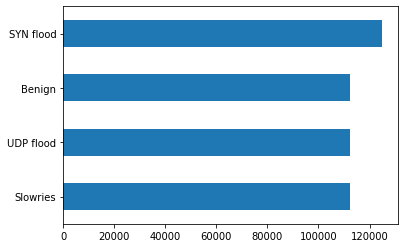

In [ ]:
df['Label'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
x , y = df.loc[: , df.columns != 'Label'] , df['Label']
# Only select rows that have all finite entries
x = x[np.all(np.isfinite(x), axis=1)]
scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 0.04991216, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ],
       [ 0.04922617, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ],
       [ 0.05014083, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ],
       ...,
       [ 1.17323113, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ],
       [ 1.12944169, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ],
       [ 1.02328377, -0.03690835, -0.57581933, ..., -0.5890084 ,
        -0.80418798, -0.5648617 ]])

In [ ]:
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
#x = x.apply(lambda x: (x*255))

In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,261892.000000,261892.000000,261892.000000,2.618920e+05,261892.000000,261892.000000,2.618920e+05,2.618920e+05,261892.000000,261892.000000,...,261892.000000,261892.0,2.618920e+05,2.618920e+05,2.618920e+05,2.618920e+05,2.618920e+05,2.618920e+05,2.618920e+05,2.618920e+05
mean,34769.900700,103.304110,10.744559,6.420058e+07,4.369744,2.838647,7.914550e+02,1.718356e+02,0.760180,0.161334,...,1.049940,0.0,9.276166e+05,4.710957e+04,9.642598e+05,8.933615e+05,2.434884e+07,1.088536e+07,3.593007e+07,1.549854e+07
std,19539.375022,1014.597821,5.455205,4.017463e+07,203.734785,53.786620,1.482882e+05,2.939801e+04,26.814558,6.764093,...,193.929882,0.0,1.994265e+06,3.998432e+05,2.113042e+06,1.936464e+06,1.838669e+07,1.196549e+07,2.413570e+07,1.803310e+07
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17519.750000,80.000000,6.000000,2.787715e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.437957e+07,0.000000e+00,1.962924e+07,5.588364e+06
50%,35798.000000,80.000000,6.000000,7.150377e+07,3.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.230048e+07,8.557893e+06,3.531824e+07,9.661026e+06
75%,52549.000000,80.000000,17.000000,9.961713e+07,4.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,6.500000e+02,0.000000e+00,8.472500e+02,4.970000e+02,3.165079e+07,1.686120e+07,5.104900e+07,1.823809e+07
max,65535.000000,58982.000000,17.000000,1.199999e+08,51839.000000,15699.000000,4.091906e+07,9.419795e+06,1460.000000,1400.000000,...,51839.000000,0.0,8.906324e+07,3.166966e+07,8.906324e+07,8.906324e+07,1.199921e+08,7.674355e+07,1.199921e+08,1.199921e+08


In [ ]:
df0=df[df['Label']=='Benign'].drop(['Label'],axis=1)
df1=df[df['Label']=='UDP flood'].drop(['Label'],axis=1)
df2=df[df['Label']=='SYN flood'].drop(['Label'],axis=1)
df3=df[df['Label']=='Slowries'].drop(['Label'],axis=1)

In [ ]:
# Generate 79*79 color images for class 0 (BENIGN)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=237:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 1 (UDP attack)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):
    count=count+1
    if count<=237:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 2 (SYN attack)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):
    count=count+1
    if count<=237:
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 3 (Slowries attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):
    count=count+1
    if count<=237:
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

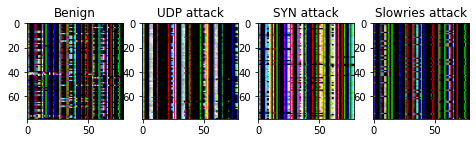

In [ ]:
# Read the images for each category
img1 = Image.open('./train/0/237.png')
img2 = Image.open('./train/1/237.png')
img3 = Image.open('./train/2/237.png')
img4 = Image.open('./train/3/237.png')


plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Benign")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("UDP attack")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("SYN attack")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Slowries attack")
plt.show()  # display it

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

1936


In [ ]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//3	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

In [ ]:
# The size of test set
Numbers

645

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
#"categorical": 2D output (aka. list of numbers of length N), [0, 0, 1, 0], which is a one-hot encoding (only one number is 1/ "hot") representing the donkey. This is for mutually exclusive labels
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1291 images belonging to 4 classes.
Found 645 images belonging to 4 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        #plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('diagram.jpg')
        plt.show()

In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
    )

Epoch 1/20
 6/11 [===============>..............] - ETA: 2s - loss: 1.3656 - accuracy: 0.2760

11/11 [==============================] - ETA: 0s - loss: 1.3262 - accuracy: 0.3509
Epoch 1: val_accuracy improved from -inf to 0.26047, saving model to ./model_own.h5
11/11 [==============================] - 25s 870ms/step - loss: 1.3262 - accuracy: 0.3509 - val_loss: 1.1630 - val_accuracy: 0.2605
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.9298 - accuracy: 0.5693
Epoch 2: val_accuracy improved from 0.26047 to 0.72558, saving model to ./model_own.h5
11/11 [==============================] - 8s 715ms/step - loss: 0.9298 - accuracy: 0.5693 - val_loss: 0.5963 - val_accuracy: 0.7256
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.8443
Epoch 3: val_accuracy improved from 0.72558 to 1.00000, saving model to ./model_own.h5
11/11 [==============================] - 8s 717ms/step - loss: 0.4437 - accuracy: 0.8443 - val_loss: 0.2240 - val_accuracy: 1.0000
Epoch 4/20
11/11 [==============================] - ETA: 0s - loss: 0.1706 - 

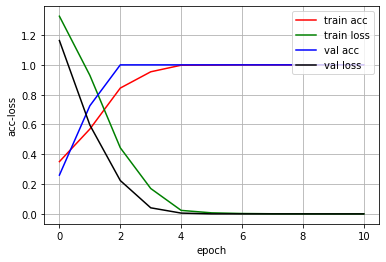

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=4,epochs=20)
history_this.loss_plot('epoch')
#history_this.loss_plot('batch')
plt.show()

In [ ]:
#hyperparameter optimazation
def CNN( num_class,epochs=20,lr=0.001,patience=8, dropout_rate=0.4,verbose=0, savepath='./model_own.h5',history=history_this,input_shape=INPUT_SIZE):

    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
        verbose = verbose
    )
    return hist

In [ ]:
def prediction(CNN_model):
#read images from validation folder
    rootdir = './test_224/'
    test_laels = []
    test_images=[]
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
                continue
            test_laels.append(subdir.split('/')[-1])
            test_images.append(os.path.join(subdir, file))

    predict=[]
    length=len(test_images)
    label=validation_generator.class_indices
    label={v: k for k, v in label.items()}
    for i in range(length):
        inputimg=test_images[i]
        test_batch=[]
        thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
        #print(thisimg)
        test_shape=(1,)+thisimg.shape
        thisimg=thisimg.reshape(test_shape)
        CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
        #generate result by model 1
        prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
        res=label[np.argmax(CNN_model_batch,axis=1)[0]]
        predict.append(res)
    acc=accuracy_score(test_laels,predict)
    return acc

In [ ]:
#define the objective function to be optimized
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics

def objective(params):

    params = {
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }

    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    CNN(num_class=4, epochs=epochs ,patience=patience, lr=lr, dropout_rate=dropout_rate)

    acc=prediction(CNN_model=load_model('./model_own.h5'))

    print('accuracy:%s'%acc)
    return {'loss': -acc, 'status': STATUS_OK }


In [ ]:
#Hyperparameter optimization by Bayesian optimization - Tree Parzen Estimator
space = {

    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=8)

print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

  0%|          | 0/8 [00:00<?, ?it/s, best loss: ?]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy improved from 0.46350 to 0.55839, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.55839 to 0.99270, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99270


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270

accuracy:0.9927007299270073
 12%|█▎        | 1/8 [01:45<12:17, 105.38s/it, best loss: -0.9927007299270073]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy improved from 0.46350 to 0.98540, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.98540 to 0.99270, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99270


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270


Epoch 11: val_accuracy did not improve from 0.99270


Epoch 12: val_accuracy did not improve from 0.99270


Epoch 13: val_accuracy did not improve from 0.99270

Epoch 13: early stopping

accuracy:0.9927007299270073
 25%|██▌       | 2/8 [03:56<12:02, 120.40s/it, best loss: -0.9927007299270073]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy improved from 0.46350 to 0.86496, saving model to ./model_own.h5


Epoch 4: val_accuracy did not improve from 0.86496


Epoch 5: val_accuracy improved from 0.86496 to 0.89781, saving model to ./model_own.h5


Epoch 6: val_accuracy improved from 0.89781 to 0.99270, saving model to ./model_own.h5


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy improved from 0.99270 to 0.99635, saving model to ./model_own.h5


Epoch 9: val_accuracy did not improve from 0.99635


Epoch 10: val_accuracy did not improve from 0.99635

accuracy:0.9963503649635036
 38%|███▊      | 3/8 [05:41<09:27, 113.42s/it, best loss: -0.9963503649635036]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy improved from 0.46350 to 0.48175, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.48175 to 0.99270, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99270


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270


Epoch 11: val_accuracy did not improve from 0.99270


Epoch 12: val_accuracy did not improve from 0.99270


Epoch 13: val_accuracy did not improve from 0.99270

Epoch 13: early stopping

accuracy:0.9927007299270073
 50%|█████     | 4/8 [07:52<08:02, 120.54s/it, best loss: -0.9963503649635036]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy improved from 0.46350 to 0.55839, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.55839


Epoch 6: val_accuracy improved from 0.55839 to 0.99270, saving model to ./model_own.h5


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270

accuracy:0.9927007299270073
 62%|██████▎   | 5/8 [09:37<05:44, 114.78s/it, best loss: -0.9963503649635036]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy did not improve from 0.46350


Epoch 5: val_accuracy improved from 0.46350 to 0.53285, saving model to ./model_own.h5


Epoch 6: val_accuracy improved from 0.53285 to 0.99270, saving model to ./model_own.h5


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270

accuracy:0.9927007299270073
 75%|███████▌  | 6/8 [11:23<03:43, 111.82s/it, best loss: -0.9963503649635036]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy did not improve from 0.46350


Epoch 5: val_accuracy improved from 0.46350 to 0.74088, saving model to ./model_own.h5


Epoch 6: val_accuracy improved from 0.74088 to 0.99270, saving model to ./model_own.h5


Epoch 7: val_accuracy did not improve from 0.99270


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270


Epoch 11: val_accuracy did not improve from 0.99270


Epoch 12: val_accuracy did not improve from 0.99270


Epoch 13: val_accuracy did not improve from 0.99270


Epoch 14: val_accuracy did not improve from 0.99270

Epoch 14: early stopping

accuracy:0.9927007299270073
 88%|████████▊ | 7/8 [13:43<02:01, 121.09s/it, best loss: -0.9963503649635036]


Epoch 1: val_accuracy improved from -inf to 0.46350, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.46350


Epoch 3: val_accuracy did not improve from 0.46350


Epoch 4: val_accuracy did not improve from 0.46350


Epoch 5: val_accuracy did not improve from 0.46350


Epoch 6: val_accuracy improved from 0.46350 to 0.91606, saving model to ./model_own.h5


Epoch 7: val_accuracy improved from 0.91606 to 0.99270, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99270


Epoch 9: val_accuracy did not improve from 0.99270


Epoch 10: val_accuracy did not improve from 0.99270


Epoch 11: val_accuracy did not improve from 0.99270


Epoch 12: val_accuracy did not improve from 0.99270


Epoch 13: val_accuracy did not improve from 0.99270


Epoch 14: val_accuracy did not improve from 0.99270


Epoch 15: val_accuracy did not improve from 0.99270

Epoch 15: early stopping

accuracy:0.9927007299270073
100%|██████████| 8/8 [16:14<00:00, 121.8

In [ ]:
#Hyperparameter optimization by Random search
space = {

    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=objective,
            space=space,
            algo=rand.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

In [ ]:
# Retrain the model by using the best hyperparameter values to obtain the best model
CNN(num_class=4, epochs=15,patience=3, lr=0.002, dropout_rate=0.6,verbose=1)

In [ ]:
#compute other parameters
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 646 images belonging to 4 classes.


In [ ]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: '0', 1: '1', 2: '2', 3: '3'}


In [ ]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

0 ./test_224/0/68781.png


In [ ]:
#load model 1: CNN
CNN_model=load_model('./model_own.h5')

1/1 [==============================] - 0s 200ms/step
Predicted result for the first image: 0
Confidence level: 0.676122


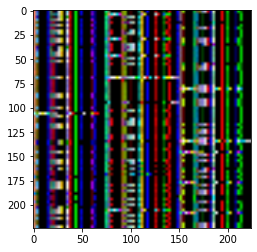

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=CNN_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
    res=label[np.argmax(CNN_model_batch,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 17ms/step
CPU times: user 29.5 s, sys: 1.5 s, total: 31 s
Wall time: 33.2 s


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3']
print(classification_report(test_laels, predict, target_names=target_names, digits=5))

CNN accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
[[159   0   0   0]
 [  0 144   0   0]
 [  0   0 177   0]
 [  0   0   0 166]]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       159
           1    1.00000   1.00000   1.00000       144
           2    1.00000   1.00000   1.00000       177
           3    1.00000   1.00000   1.00000       166

    accuracy                        1.00000       646
   macro avg    1.00000   1.00000   1.00000       646
weighted avg    1.00000   1.00000   1.00000       646



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC : ',ACC)

TPR :  [1. 1. 1. 1.]
TNR :  [1. 1. 1. 1.]
PPV :  [1. 1. 1. 1.]
FPR :  [0. 0. 0. 0.]
FNR :  [0. 0. 0. 0.]
ACC :  [1. 1. 1. 1.]
